In [1]:
from ucimlrepo import fetch_ucirepo 
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# create data frames
pd_df_features = pd.DataFrame(breast_cancer_wisconsin_diagnostic.data.features)
pd_df_targets = pd.DataFrame(breast_cancer_wisconsin_diagnostic.data.targets)

print(pd_df_features)

     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010          0.14710     0.241

In [3]:
#encode the data diagnosis column
# print(pd_df_targets['Diagnosis'])
label_encoder = LabelEncoder()
pd_df_targets['Diagnosis'] = label_encoder.fit_transform(pd_df_targets['Diagnosis'])
# print(pd_df_targets['Diagnosis'])

In [4]:
#Create X and Y sets
X = pd_df_features
Y = pd_df_targets

#description
X.describe()
# Y.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# Normalization of X
X = (X-np.min(X)) / (np.max(X) - np.min(X))
print(X)

      radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
0    0.004229  0.002440    0.028867  0.235308     0.000028      0.000065   
1    0.004835  0.004177    0.031241  0.311707     0.000020      0.000018   
2    0.004629  0.004995    0.030559  0.282793     0.000026      0.000038   
3    0.002685  0.004791    0.018237  0.090762     0.000033      0.000067   
4    0.004770  0.003371    0.031758  0.304890     0.000024      0.000031   
..        ...       ...         ...       ...          ...           ...   
564  0.005068  0.005263    0.033380  0.347673     0.000026      0.000027   
565  0.004732  0.006641    0.030842  0.296427     0.000023      0.000024   
566  0.003902  0.006601    0.025458  0.201716     0.000020      0.000024   
567  0.004843  0.006895    0.032934  0.297367     0.000028      0.000065   
568  0.001824  0.005769    0.011265  0.042548     0.000012      0.000010   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0      0.000071

In [6]:
pd_df_cancer = pd_df_features
pd_df_cancer["Diagnosis"] = pd_df_targets

<Axes: >

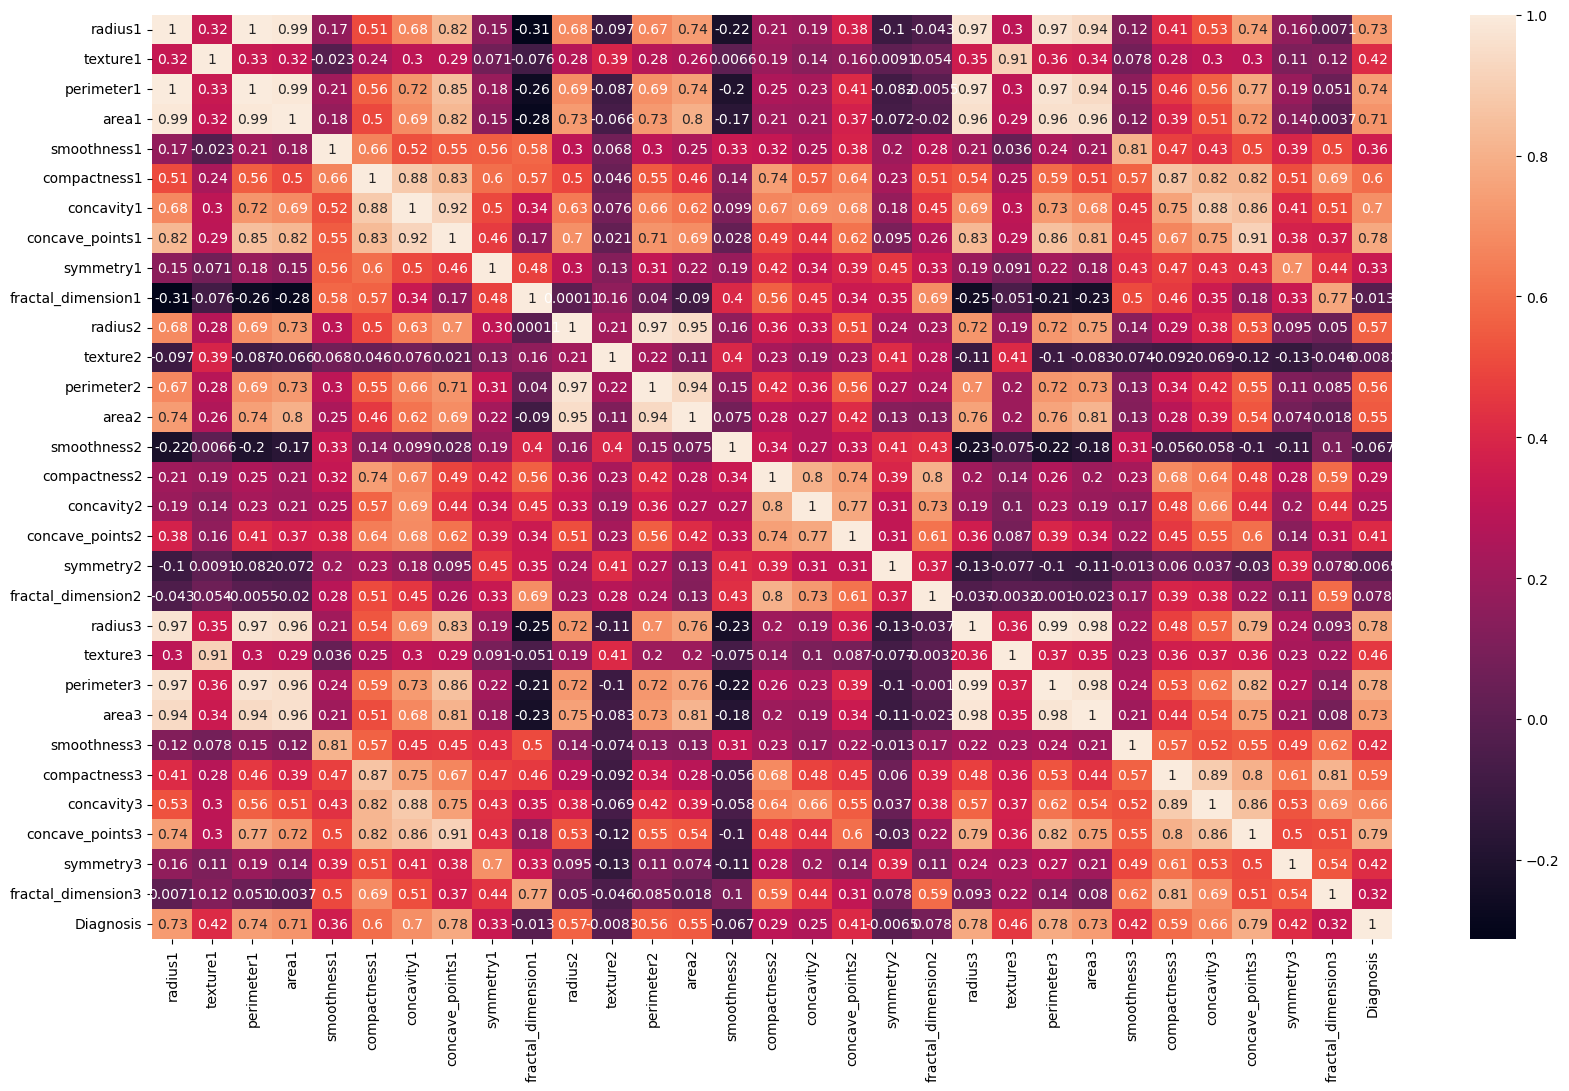

In [7]:
pd_df_cancer.describe()
plt.figure(figsize = (20,12))
sns.heatmap(pd_df_cancer.corr(), annot=True)

In [8]:
# split data into test and train - 30% and 70%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [9]:
#decision_tree_model 
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)


DecisionTreeClassifier()

In [10]:
#prediction 
decision_tree.score(X_test, Y_test)

0.9298245614035088

In [11]:
#training_prediction
decision_tree.score(X_train, Y_train)

1.0

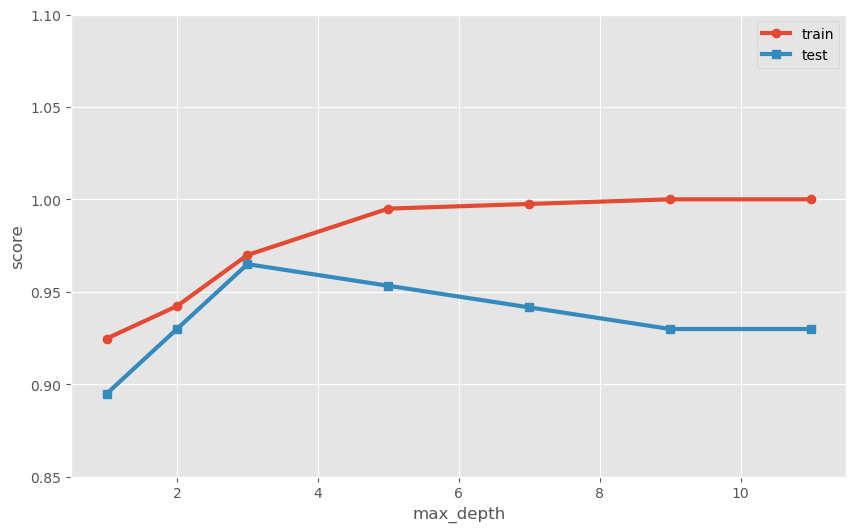

In [12]:
max_depths = np.array([1, 2, 3, 5, 7, 9, 11])
train_score = []
test_score = []

for d in max_depths:
    decision_tree_classifier = DecisionTreeClassifier(max_depth=d, random_state=42)
    decision_tree_classifier.fit(X_train, Y_train)
    train_score.append(decision_tree_classifier.score(X_train, Y_train))
    test_score.append(decision_tree_classifier.score(X_test, Y_test))

plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.ylim(0.85, 1.1)
plt.legend()

In [13]:
# split data into test and train - 20% and 80%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)



(114, 30)
(114, 1)
(455, 30)
(455, 1)


In [14]:
#support_vector_machine_model
support_vector_classifier_model = SVC()
support_vector_classifier_model.fit(X_train,Y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [15]:
#Prediction
Y_predict = support_vector_classifier_model.predict(X_test)

<function matplotlib.pyplot.ioff() -> 'ExitStack'>

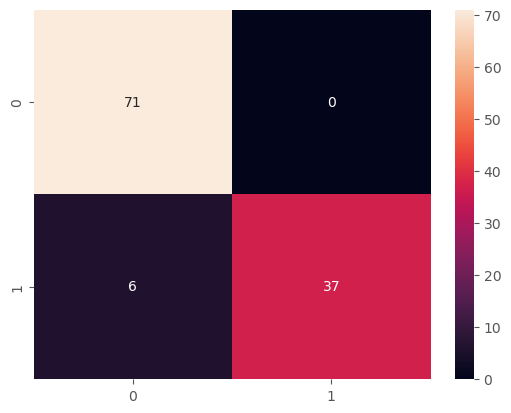

In [16]:
#confusion matrix
confus_matrix = confusion_matrix(Y_test, Y_predict)
sns.heatmap(confus_matrix, annot=True)
plt.ioff

In [17]:
#classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

